In [2]:
import pandas as pd 

df = pd.read_csv(
    'https://covid.ourworldindata.org/data/owid-covid-data.csv', 
    usecols=['date', 'location', 'total_cases_per_million', 'new_cases_per_million', 'new_deaths_per_million', 'reproduction_rate', 'total_tests_per_thousand', 'new_tests_per_thousand', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'population', 'life_expectancy'], 
    parse_dates=['date'])

df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8228 entries, 1358 to 101342
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             8228 non-null   object        
 1   date                                 8228 non-null   datetime64[ns]
 2   total_cases_per_million              8228 non-null   float64       
 3   new_cases_per_million                8228 non-null   float64       
 4   new_deaths_per_million               8228 non-null   float64       
 5   reproduction_rate                    8228 non-null   float64       
 6   total_tests_per_thousand             8228 non-null   float64       
 7   new_tests_per_thousand               8228 non-null   float64       
 8   total_vaccinations_per_hundred       8228 non-null   float64       
 9   people_vaccinated_per_hundred        8228 non-null   float64       
 10  people_

In [3]:
df1 = df.query('population > 50000000 and life_expectancy > 78')
df1.to_csv('covid_data.csv', sep='\t', encoding='utf-8')
print(df1['location'].unique())

['Italy' 'Japan' 'South Korea' 'United Kingdom' 'United States']


In [4]:
print(df1.groupby(['location'])['total_cases_per_million'].max())


location
Italy              70575.190
Japan               6420.871
South Korea         3225.017
United Kingdom     73770.199
United States     101955.417
Name: total_cases_per_million, dtype: float64


In [5]:
print(df1.groupby(['location'])['total_vaccinations_per_hundred'].max())


location
Italy              91.50
Japan              44.66
South Korea        39.15
United Kingdom    117.55
United States      99.03
Name: total_vaccinations_per_hundred, dtype: float64


<AxesSubplot:title={'center':'Total cases per million'}, xlabel='date'>

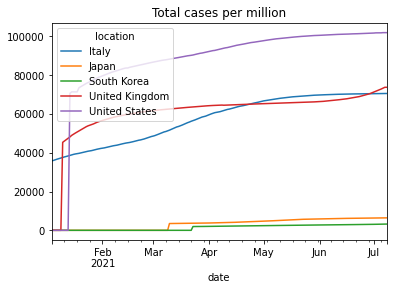

In [6]:
import matplotlib.pyplot as plt

tcpm = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='total_cases_per_million',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
tcpm = tcpm.fillna(method='ffill').fillna(0)
tcpm.plot(title='Total cases per million')


<AxesSubplot:title={'center':'Total vaccinations per hundred'}, xlabel='date'>

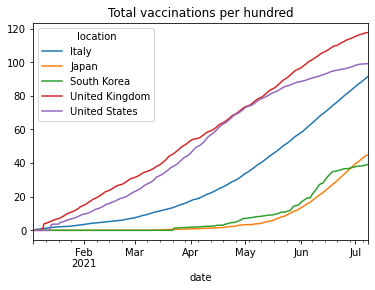

In [7]:
tvph = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='total_vaccinations_per_hundred',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
tvph = tvph.fillna(method='ffill').fillna(0)
tvph.plot(title='Total vaccinations per hundred')

<AxesSubplot:title={'center':'Reproduction rate'}, xlabel='date'>

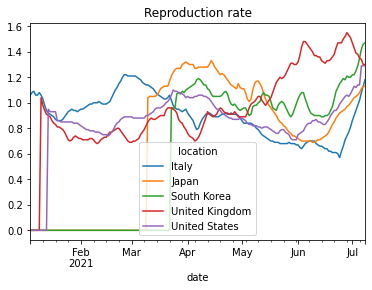

In [8]:
rert = pd.pivot_table(
    data=df1,                                   # What dataframe to use
    index='date',                               # The "rows" of your dataframe
    columns='location',                         # What values to show as columns
    values='reproduction_rate',           # What values to aggregate
    aggfunc='mean',                             # How to aggregate data
    )
rert = rert.fillna(method='ffill').fillna(0)
rert.plot(title='Reproduction rate')